In [1]:
import pandas as pd
import numpy as np
import scipy

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

## Parameters

In [2]:
# The filtering based on hotspots.
filter_version = 'including'  # 'including', 'excluding', 'only'

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

## Import total indel freqs

In [3]:
def get_freqs():
    # Combine indel freqs for the three species.
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{FREQS_PREFIX}{alignment}_{species}.txt' )
        list_df.append( df )
    df_freqs = pd.concat(list_df)
    return df_freqs

df_freqs = get_freqs()
df_freqs

,Species,Tissue,Age_group,No_mutations,Nucleotides,Frequency
0,mouse,Oo,Younger,74,355876140,2.079375e-07
1,mouse,Oo,Older,60,260177071,2.306122e-07
2,mouse,M,Younger,89,620391888,1.434577e-07
3,mouse,M,Older,75,209464071,3.580566e-07
4,mouse,Br,Younger,66,597944779,1.103781e-07
5,mouse,Br,Older,63,186069735,3.385827e-07
0,macaque,Oo,Younger,44,497593638,8.842557e-08
1,macaque,Oo,Interm_1,13,153164749,8.487593e-08
2,macaque,Oo,Interm_2,45,339511163,1.325435e-07
3,macaque,Oo,Older,17,340619167,4.990911e-08


## Import indels

In [4]:
def get_indels():
    # Combine indels for the three species.
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)

    # Classify as Insertion or Deletion.
    df_indels['Mutation_type'] = np.where(
        df_indels['REF'].str.len() > df_indels['ALT'].str.len(), 'Deletion',
        np.where(df_indels['REF'].str.len() < df_indels['ALT'].str.len(), 'Insertion', 'Other')
    )
    df_indels['Unique_mutation_ID'] = df_indels['POS'].astype(str) +'_'+ df_indels['Mutation_type']

    return df_indels

df_indels = get_indels()
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Mutation_type,Unique_mutation_ID
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,Deletion,12343_Deletion
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,NaN,germline,Germline de novo,13053_T_TC,Between pedigrees,G133p4_13053,non-D-loop,15423,Insertion,13053_Insertion
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,Deletion,14806_Deletion
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423,Insertion,14640_Insertion
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,NaN,somatic,Somatic de novo,5171_G_GA,Between pedigrees,G133p4_5171,non-D-loop,15423,Insertion,5171_Insertion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447,Insertion,864_Insertion
179,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,Deletion,865_Deletion
180,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,Insertion,954_Insertion
181,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,Deletion,960_Deletion


## Import Gene Features

In [5]:
def get_gene_features():
    # Define file paths
    GENE_FILES = {
        'mouse': 'gene_features/gene_features_mouse_NC_005089.txt',
        'macaque': 'gene_features/gene_features_macaque_NC_005943.txt',
        'human': 'gene_features/gene_features_human_NC_012920.txt'
    }
    
    # Initialize a list to store dataframes
    list_df = []
    
    # Iterate over species and their respective files
    for species, file_path in GENE_FILES.items():
        # Read the table and handle missing values
        gene_feats = pd.read_table(file_path, skiprows=1, 
                                   names=['START', 'END', 'Gene_feature', 'Gene_feature_category', 'Note'])
        gene_feats = gene_feats.fillna('-')
        
        # Group by START and END and aggregate columns
        gene_feats = gene_feats.groupby(['START', 'END'], as_index=False).agg({
            'Gene_feature': lambda x: ';'.join(map(str, x.dropna())),
            'Gene_feature_category': lambda x: ';'.join(map(str, x.dropna())),
            'Note': lambda x: ';'.join(map(str, x.dropna()))
        })
        
        # Extract `Gene`, `Gene_name`, and `Gene_type` from the aggregated Note and Gene_feature
        gene_feats['Gene'] = gene_feats['Note'].str.split(';').str[0].fillna('-')
        gene_feats['Gene_name'] = gene_feats['Note'].str.split(';').str[1].fillna('-')
        gene_feats['Gene_type'] = gene_feats['Gene_feature'].str.split(';').str[-1].fillna('-')

        # Filter rows containing 'gene' in `Gene_feature` (case-insensitive)
        gene_feats = gene_feats[(gene_feats['Gene_feature'].str.contains('gene', case=False, na=False))|(gene_feats['Gene_feature']=='D-loop')]

        gene_feats['Species'] = species
        
        # Append the processed dataframe
        list_df.append(gene_feats)
    
    # Combine all dataframes into a single dataframe
    combined_gene_feats = pd.concat(list_df, ignore_index=True)

    # Fill missing D-loop columns.
    combined_gene_feats.loc[ combined_gene_feats['Gene_feature']=='D-loop', 'Gene' ] = combined_gene_feats['Gene_type']
    combined_gene_feats.loc[ combined_gene_feats['Gene_feature']=='D-loop', 'Gene_name' ] = combined_gene_feats['Gene_type']

    # Keep relevant columns.
    combined_gene_feats = combined_gene_feats[['Species','Gene_type','START','END','Gene','Gene_name']]

    # Export.
    combined_gene_feats.to_csv( f'gene_features/gene_features_all.tab', index=None, sep="\t" )

    # Bed format
    bed_file = combined_gene_feats.copy()
    bed_file['CHR'] = bed_file['Species'] +'_'+ 'chrM'
    bed_file['Name'] = '.'
    bed_file['Score'] = '.'
    bed_file['Strand'] = '.'
    bed_file = bed_file[[ 'CHR','START','END','Name','Score','Strand',
                                     'Gene_type','Gene','Gene_name' ]]
    # Ensure START <= END
    bed_file[['START', 'END']] = bed_file[['START', 'END']].apply(
        lambda x: sorted(x) if x[0] > x[1] else x, axis=1
    )
    bed_file = bed_file.sort_values( ['CHR','START','END'] )
    bed_file.to_csv( f'gene_features/gene_features_all.bed', index=None, sep="\t", header=None )

    return combined_gene_feats


# Call the function
gene_feats = get_gene_features()

/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_36069/3339869924.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: sorted(x) if x[0] > x[1] else x, axis=1


## Merge intersecting coordinates with bedtools

In [6]:
!bedtools merge -c 7,8,9 -o distinct -i gene_features/gene_features_all.bed > gene_features/merged.gene_features_all.bed

gene_feats = pd.read_table( "gene_features/merged.gene_features_all.bed", names=['CHR','START','END','Gene_type','Gene','Gene_name'] )
gene_feats['Species'] = gene_feats['CHR'].str.split('_').str[0]
gene_feats['Chr'] = 'chrM'
# If CDS and tRNA overlap, consider the indel in CDS.
gene_feats.loc[ gene_feats['Gene_type'].str.contains('CDS,tRNA'), 'Gene_type' ] = 'CDS'
gene_feats

,CHR,START,END,Gene_type,Gene,Gene_name,Species,Chr
0,human_chrM,1,576,D-loop,D-loop,D-loop,human,chrM
1,human_chrM,577,647,tRNA,TRNF,tRNA-Phe,human,chrM
2,human_chrM,648,1601,rRNA,RNR1,s-rRNA,human,chrM
3,human_chrM,1602,1670,tRNA,TRNV,tRNA-Val,human,chrM
4,human_chrM,1671,3229,rRNA,RNR2,l-rRNA,human,chrM
...,...,...,...,...,...,...,...,...
92,mouse_chrM,14071,14139,tRNA,TrnE,tRNA-Glu,mouse,chrM
93,mouse_chrM,14145,15288,CDS,CYTB,cytochrome b,mouse,chrM
94,mouse_chrM,15289,15355,tRNA,TrnT,tRNA-Thr,mouse,chrM
95,mouse_chrM,15356,15422,tRNA,TrnP,tRNA-Pro,mouse,chrM


## Annotate indels with gene features

In [7]:
def annotate_with_gene_features(gene_feats, target_df):
    """
    Annotate `target_df` with gene features using START and END intervals from `gene_feats`.
    
    Parameters:
    - gene_feats: DataFrame with START, END, and annotation columns, including 'Species'.
    - target_df: DataFrame with coordinates to annotate, must have 'POS'.
    
    Returns:
    - Annotated DataFrame with matching gene features, including the 'Species' column from gene_feats.
    """
    # Validate inputs
    if target_df is None or not isinstance(target_df, pd.DataFrame):
        raise ValueError("`target_df` must be a valid DataFrame.")
    if 'POS' not in target_df.columns:
        raise ValueError("`target_df` must contain a 'POS' column.")
    if target_df['POS'].isnull().all():
        raise ValueError("`POS` column in `target_df` contains no valid data.")
    
    # Ensure START <= END
    gene_feats[['START', 'END']] = gene_feats[['START', 'END']].apply(
        lambda x: sorted(x) if x[0] > x[1] else x, axis=1
    )
    
    # Create interval index from gene_feats
    gene_intervals = pd.IntervalIndex.from_arrays(gene_feats['START'], gene_feats['END'], closed='both')
    
    # Annotate target_df with gene features
    annotations = []
    for position in target_df['POS']:
        # Find matches within the intervals
        matching_idx = gene_intervals.contains(position)
        if matching_idx.any():
            match = gene_feats.loc[matching_idx].iloc[0]  # Take the first match
            annotation = match.to_dict()  # Convert to a dictionary
            annotation['Species'] = match['Species']  # Add Species column to the annotation
            annotations.append(annotation)
        else:
            # If no match, create a dictionary with None values for all columns
            annotations.append({col: None for col in gene_feats.columns})
    
    # Merge annotations with target_df
    annotation_df = pd.DataFrame(annotations)
    annotated_target = pd.concat([target_df.reset_index(drop=True), annotation_df], axis=1)
    
    # Remove the duplicate 'Species' column if it exists in the annotation DataFrame
    if 'Species' in annotated_target.columns:
        annotated_target = annotated_target.loc[:, ~annotated_target.columns.duplicated()]

    # # If CDS and tRNA overlap, consider the indel in CDS.
    # annotated_target.loc[ annotated_target['Gene_type'].str.contains('CDS,tRNA'), 'Gene_type' ] = 'CDS'
    
    return annotated_target

# Call the function to annotate the target DataFrame
annotated_df = annotate_with_gene_features(gene_feats=gene_feats, target_df=df_indels)
annotated_df#[['Mutation_ID','Unique_mutation_ID']]


/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_36069/2680957744.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: sorted(x) if x[0] > x[1] else x, axis=1


,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Region_size,Mutation_type,Unique_mutation_ID,CHR,START,END,Gene_type,Gene,Gene_name,Chr
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,15423,Deletion,12343_Deletion,human_chrM,12337,14148,CDS,ND5,NADH dehydrogenase subunit 5,chrM
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,15423,Insertion,13053_Insertion,human_chrM,12337,14148,CDS,ND5,NADH dehydrogenase subunit 5,chrM
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,15423,Deletion,14806_Deletion,human_chrM,14747,15887,CDS,CYTB,cytochrome b,chrM
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,15423,Insertion,14640_Insertion,human_chrM,14149,14673,CDS,ND6,NADH dehydrogenase subunit 6,chrM
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,15423,Insertion,5171_Insertion,human_chrM,4470,5511,CDS,ND2,NADH dehydrogenase subunit 2,chrM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,15447,Insertion,864_Insertion,human_chrM,648,1601,rRNA,RNR1,s-rRNA,chrM
2713,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,15447,Deletion,865_Deletion,human_chrM,648,1601,rRNA,RNR1,s-rRNA,chrM
2714,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,15447,Insertion,954_Insertion,human_chrM,648,1601,rRNA,RNR1,s-rRNA,chrM
2715,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,15447,Deletion,960_Deletion,human_chrM,648,1601,rRNA,RNR1,s-rRNA,chrM


## Summarize per gene region

In [8]:
def calculate_region_length_with_overlap(df):
    """
    Calculate the region length of each Gene_type by Species, handling overlapping intervals.

    Parameters:
    - df: DataFrame with columns 'Species', 'Gene_type', 'START', 'END'

    Returns:
    - A DataFrame with total non-overlapping lengths for each Gene_type by Species.
    """
    result = []

    # Group by 'Species' and 'Gene_type'
    for (species, gene_type), group in df.groupby(['Species', 'Gene_type']):
        # Sort intervals by START
        intervals = group[['START', 'END']].sort_values(by='START').values
        
        # Merge overlapping intervals
        merged_intervals = []
        start, end = intervals[0]
        
        for i in range(1, len(intervals)):
            curr_start, curr_end = intervals[i]
            if curr_start <= end:  # Overlapping
                end = max(end, curr_end)  # Extend the interval
            else:  # No overlap, save the interval
                merged_intervals.append((start, end))
                start, end = curr_start, curr_end
        
        # Append the last interval
        merged_intervals.append((start, end))
        
        # Calculate region length
        region_length = sum(end - start + 1 for start, end in merged_intervals)
        result.append({'Species': species, 'Gene_type': gene_type, 'Region_length': region_length})
    
    # Return results as a DataFrame
    result =  pd.DataFrame(result)
    
    return result

size_gene_feats = calculate_region_length_with_overlap(gene_feats)
size_gene_feats#.groupby('Species')['Region_length'].sum()

,Species,Gene_type,Region_length
0,human,CDS,11341
1,human,D-loop,1122
2,human,rRNA,2513
3,human,tRNA,1504
4,macaque,CDS,11413
5,macaque,D-loop,1085
6,macaque,rRNA,2505
7,macaque,tRNA,1432
8,mouse,CDS,11604
9,mouse,D-loop,877


## Counts per region (mutations considered once per loci)

In [9]:
# Removes multiple instances of same mutation in that species.
counts_per_region = annotated_df.drop_duplicates(subset=['Species','Mutation_ID']).groupby(by=['Species','Gene_type']).size().reset_index(name='Observed')

# # Keeps multiple instances per loci.
# counts_per_region = annotated_df.groupby(by=['Species','Gene_type']).size().reset_index(name='Observed')
counts_per_region

,Species,Gene_type,Observed
0,human,CDS,58
1,human,D-loop,29
2,human,rRNA,29
3,human,tRNA,31
4,macaque,CDS,698
5,macaque,D-loop,98
6,macaque,rRNA,194
7,macaque,tRNA,150
8,mouse,CDS,180
9,mouse,D-loop,18


## Mean Read Depth per Species

In [10]:
# Import annotations and seq depths
def get_annots():
    annots = pd.read_table(f"tables/annotations.seqDepth.{alignment}.txt")
    return annots

annots = get_annots()
annots

,SRR_ID,Sample_ID,Individual,Tissue,Tissue_alt,Species,Age_group,Age,MeanReadDepth,Nucleotides
0,SRR10068699,G133p4_Oo2,G133p4,Oo,Oo2,mouse,Younger,0.083333,143.790061,2343778
1,SRR10068701,G133p4_Oo,G133p4,Oo,Oo,mouse,Younger,0.083333,1627.007669,26520225
2,SRR10068702,G133p4_M,G133p4,M,M,mouse,Younger,0.083333,1146.431288,18686830
3,SRR10068703,G133p4_Br,G133p4,Br,Br,mouse,Younger,0.083333,698.298712,11382269
4,SRR10068705,G133p3_Oo3,G133p3,Oo,Oo3,mouse,Younger,0.083333,116.046564,1891559
...,...,...,...,...,...,...,...,...,...,...
489,hs023_Oo1,hs023_Oo1,hs023,Oo,Oo1,human,Intermediate,33.000000,1959.128734,32460804
490,hs023_Oo2,hs023_Oo2,hs023,Oo,Oo2,human,Intermediate,33.000000,1087.038083,18011134
491,hs023_Oo3,hs023_Oo3,hs023,Oo,Oo3,human,Intermediate,33.000000,2201.843020,36482337
492,hs023_Oo4,hs023_Oo4,hs023,Oo,Oo4,human,Intermediate,33.000000,1130.984127,18739276


In [11]:
mrd_per_species = annots.groupby(['Species'])['MeanReadDepth'].sum().reset_index()
mrd_per_species

,Species,MeanReadDepth
0,human,96518.439133
1,macaque,256576.645677
2,mouse,158337.153436


## Compute expected number of mutations per region

In [12]:
table = pd.merge(pd.merge( size_gene_feats, mrd_per_species ), counts_per_region, how='left' ).fillna(0).rename(columns={'Gene_type':'Region'})
table['Observed'] = table['Observed'].astype(int)
table['Nucleotides'] = (table['Region_length'] * table['MeanReadDepth']).astype(int)
table['Region_frequency'] = table['Observed'] / table['Nucleotides'].replace(0, np.nan)
# Compute total mtDNA frequency.
table['mtDNA_observed'] = table.groupby('Species')['Observed'].transform('sum')
table['mtDNA_length'] = table.groupby('Species')['Region_length'].transform('sum')
table['mtDNA_nucleotides'] = table.groupby('Species')['Nucleotides'].transform('sum')
table['mtDNA_frequency'] = table['mtDNA_observed'] / table['mtDNA_nucleotides'].replace(0, np.nan)
table['Expected'] = (table['mtDNA_frequency'] * table['Nucleotides']).astype(int)
table

,Species,Region,Region_length,MeanReadDepth,Observed,Nucleotides,Region_frequency,mtDNA_observed,mtDNA_length,mtDNA_nucleotides,mtDNA_frequency,Expected
0,human,CDS,11341,96518.439133,58,1094615618,5.298664e-08,147,16480,1590623875,9.241657e-08,101
1,human,D-loop,1122,96518.439133,29,108293688,2.677903e-07,147,16480,1590623875,9.241657e-08,10
2,human,rRNA,2513,96518.439133,29,242550837,1.195626e-07,147,16480,1590623875,9.241657e-08,22
3,human,tRNA,1504,96518.439133,31,145163732,2.135520e-07,147,16480,1590623875,9.241657e-08,13
4,macaque,CDS,11413,256576.645677,698,2928309257,2.383628e-07,1140,16435,4216837170,2.703448e-07,791
5,macaque,D-loop,1085,256576.645677,98,278385660,3.520296e-07,1140,16435,4216837170,2.703448e-07,75
6,macaque,rRNA,2505,256576.645677,194,642724497,3.018401e-07,1140,16435,4216837170,2.703448e-07,173
7,macaque,tRNA,1432,256576.645677,150,367417756,4.082546e-07,1140,16435,4216837170,2.703448e-07,99
8,mouse,CDS,11604,158337.153436,180,1837344328,9.796748e-08,260,16242,2571712044,1.011000e-07,185
9,mouse,D-loop,877,158337.153436,18,138861683,1.296254e-07,260,16242,2571712044,1.011000e-07,14


## Expected mutations table

In [13]:
# # Create a new category per species of "non-D-loop" that sums the other columns
# non_dloop = table[table['Region'] != 'D-loop'].groupby('Species').sum().reset_index()
# non_dloop['Region'] = 'non-D-loop'
# exp_table = pd.concat([table, non_dloop], ignore_index=True)

# Append the new category to the existing table

exp_table = table[['Species', 'Region', 'Region_length', 'Observed', 'Expected']]
exp_table.sort_values('Species', ascending=False)

,Species,Region,Region_length,Observed,Expected
8,mouse,CDS,11604,180,185
9,mouse,D-loop,877,18,14
10,mouse,rRNA,2537,31,40
11,mouse,tRNA,1224,31,19
4,macaque,CDS,11413,698,791
5,macaque,D-loop,1085,98,75
6,macaque,rRNA,2505,194,173
7,macaque,tRNA,1432,150,99
0,human,CDS,11341,58,101
1,human,D-loop,1122,29,10


## Fisher's exact test on expected and observed counts

In [17]:
# import scipy
from statsmodels.stats.multitest import fdrcorrection

# Fisher's exact is more appropriate than Chi-square in this example.
# Given that the latter relies on approximation and some of our samples lie below 5.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5426219/#:~:text=While%20the%20chi%2Dsquared%20test,applying%20approximation%20method%20is%20inadequate.

def join_rows_rna(df,species,col_name):
    sum_rna_col = df.loc[(
            df['Species']==species)&(df['Region']).str.contains('RNA'), col_name ].sum()
    return sum_rna_col

def fishers_test_on_expected_counts(counts):
    df_counts = counts.copy()

    # # Join tRNA and rRNA values.
    # for species in ['mouse','macaque','human']:
    #     sum_obs = join_rows_rna(df_counts,species,"Observed")
    #     sum_exp = join_rows_rna(df_counts,species,"Expected")
    #     sum_len = join_rows_rna(df_counts,species,"Region_length")
    #     df_counts.loc[len(df_counts.index)] = { 'Species':species,'Region':'tRNA & rRNA', 'Region_length':sum_len, 
    #                                            'Expected':sum_exp, 'Observed':sum_obs }
    
    # Perform stat test on each condition.
    results = pd.DataFrame()
    for i,row in df_counts.iterrows():
        row_counts = pd.DataFrame([row])
        
        # Make contingency table of (e.g. Younger/Older vs. N_mutations/N_non_muts).
        expected_counts = row_counts['Expected'].tolist()[0]
        observed_counts = row_counts['Observed'].tolist()[0]
        length_region = row_counts['Region_length'].tolist()[0]
        
        contingency_table = ([ expected_counts , length_region ],
                             [ observed_counts , length_region ])
        
        # Fold difference and change in frequency between conditions.
        fold_diff = round( (observed_counts/expected_counts), 1)
        row_counts['Fold_difference'] = fold_diff
        # fold_change = round( ((observed_counts - expected_counts)/expected_counts), 1)
        # row_counts['Fold_change'] = fold_change
        
        # Fisher's exact test (two-sided).
        stat_2s,pval_2s = scipy.stats.fisher_exact(contingency_table, alternative='two-sided')
        row_counts['Comparison_2s'] = 'Observed ≠ Expected'
        row_counts['stat_2s'] = stat_2s
        row_counts['pval_2s'] = pval_2s
        # Fisher's exact test (one-sided).
        stat_1s,pval_1s = scipy.stats.fisher_exact(contingency_table, alternative='less')
        row_counts['Comparison_1s'] = 'Observed < Expected'
        row_counts['stat_1s'] = stat_1s
        row_counts['pval_1s'] = pval_1s
        
        results = pd.concat([ results, row_counts ])

    #return results
    
    # # Control for multiple testing using Benjamini-Hochberg (statsmodels.stats.multitest.fdrcorrection).
    ## Relevant when doing many categories of comparisons (as in Arbeithuber PNAS 2022 Table S6).
    # list_pvals = results['pval_2s']
    # rejected,list_pval_corr = fdrcorrection(list_pvals)
    # results['FDR_corr_pval_2s'] = list_pval_corr

    # Function to apply FDR correction per species
    def apply_fdrcorrection_per_species(results):
        # Define a helper function for FDR correction within groups
        def correct_pvals(group):
            pvals = group['pval_2s'].values  # Extract p-values as a NumPy array
            _, corrected_pvals = fdrcorrection(pvals)  # Perform FDR correction
            group['FDR_corr_pval_2s'] = corrected_pvals  # Add corrected p-values
            return group  # Return the modified group

        # Apply the correction function to each group and reset the DataFrame
        results = results.groupby('Species', group_keys=False).apply(correct_pvals)
        return results

    # Example usage
    # Ensure 'results' DataFrame includes 'Species' and 'pval_2s' columns
    results['FDR_corr_pval_2s'] = None  # Initialize column
    results = apply_fdrcorrection_per_species(results)
    
    # Is each p-value under an alpha of 0.05 ?
    results['Significance'] = [
        np.where(pval < 0.001, '***', 
        np.where(pval < 0.01, '**', 
        np.where(pval < 0.05, '*', 'ns'))) 
        for pval in results['FDR_corr_pval_2s']
    ]
 
    # Exclude the 1 sided test columns, and stat for 1 sided test.
    results = results.drop(['Comparison_1s','stat_1s','pval_1s','stat_2s','Comparison_2s','Significance'], axis=1)

    # Sort rows.
    results = results.sort_values(by=['Species'],ascending=False)
    # # Exclude some columns.
    # results = results.drop(results[results['Genomic_region'].isin(["tRNA",'rRNA'])].index)

    # # Export the results as a table.
    # results.to_csv('tables_2024/fishersExactTest_GenomicRegions2.'+FILTER_VERSION+'.'+DATE+'.tsv', index=None, sep='\t' ) 
    
    return results


test_table = fishers_test_on_expected_counts(exp_table)
test_table#.groupby('Species')['Region_length'].sum()

/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_11585/843234379.py:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = results.groupby('Species', group_keys=False).apply(correct_pvals)


,Species,Region,Region_length,Observed,Expected,Fold_difference,pval_2s,FDR_corr_pval_2s
8,mouse,CDS,11604,180,185,1.0,0.832916,0.832916
9,mouse,D-loop,877,18,14,1.3,0.593286,0.791048
10,mouse,rRNA,2537,31,40,0.8,0.339161,0.678322
11,mouse,tRNA,1224,31,19,1.6,0.115437,0.461749
4,macaque,CDS,11413,698,791,0.9,0.019959,0.039919
5,macaque,D-loop,1085,98,75,1.3,0.097363,0.129818
6,macaque,rRNA,2505,194,173,1.1,0.304322,0.304322
7,macaque,tRNA,1432,150,99,1.5,0.002313,0.009252
0,human,CDS,11341,58,101,0.6,0.000781,0.003123
1,human,D-loop,1122,29,10,2.9,0.003159,0.006319


# Export table as image

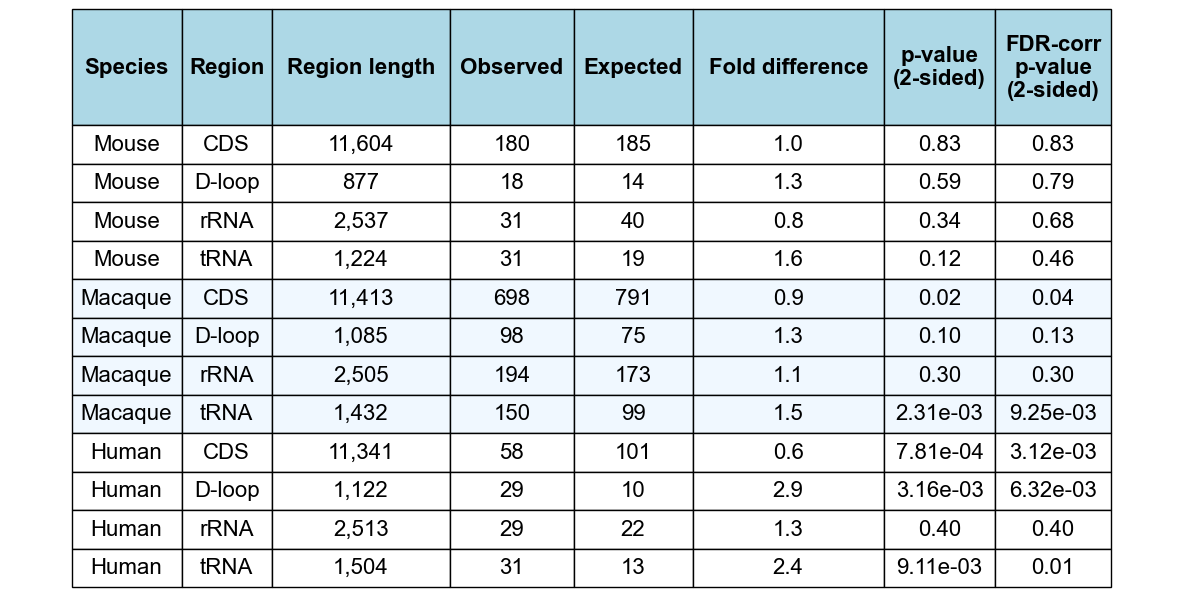

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# from pandas.plotting import table
import textwrap

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'


def enforce_line_breaks_in_headers(df, max_width=20):
    """
    Enforces line breaks in column headers by inserting `\n` when the text exceeds `max_width`.
    """
    # Replace spaces with newlines if the text length exceeds max_width
    df.columns = [
        '\n'.join(textwrap.wrap(col, max_width)) if len(col) > max_width else col
        for col in df.columns
    ]
    return df


def format_commas_in_columns(df):
    """
    Format the 'Region Length' column to display as an integer with commas.
    If the column contains commas, they are removed before conversion.
    Handles both float and integer values.
    """
    if 'Region length' in df.columns:
        df['Region length'] = df['Region length'].apply(
            lambda x: f"{int(float(str(x).replace(',', '').replace(' ', '').replace('$', ''))):,}" if pd.notnull(x) else ""
        )
    if 'Fold difference' in df.columns:
        df['Fold difference'] = df['Fold difference'].astype(float).apply(lambda x: f"{x:,.{1}f}")
    return df


def format_long_numbers(df, precision=3):
    """
    Format numbers in the dataframe:
    - Large numbers are formatted with commas (e.g., 1,000,000).
    - Floats smaller than 1 are displayed in scientific notation.
    - Precision for floats is controlled by the 'precision' parameter.
    """
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].apply(lambda x: f"{x:,.{precision}f}" if x > 0.01 else f"{x:.{precision}e}")
    return df


def export_table_as_png(df, save=True):
    df = df.copy()

    # Rename columns.
    df = df.rename(columns={'Region_length':'Region length', 'Fold_difference':'Fold difference',
                            'pval_2s':'p-value (2-sided)', 'FDR_corr_pval_2s':'FDR-corr p-value (2-sided)'})

    # Replace values.
    df = df.replace({'Interm_1':'Intermediate 1', 'Interm_2':'Intermediate 2'})
    df['Species'] = df['Species'].str.capitalize()

    # Format long numbers
    df = format_long_numbers(df, precision=2)

    # Apply custom formatting for 'Nucleotides sequenced' column
    df = format_commas_in_columns(df)

    # Enforce line breaks in column headers
    df = enforce_line_breaks_in_headers(df, max_width=15)

    # Set the font to Arial and size to 10
    fontsize = 16
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = fontsize

    # Create the figure for the table
    plt.figure(figsize=(15, 5))  # Adjust size as needed

    # Create a table using pandas' built-in functionality
    ax = plt.gca()
    ax.axis('off')  # Turn off axes
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightgrey']*len(df.columns))

    # Adjust column width.
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Scale the table (header and row scaling)
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.get_text().set_fontsize(fontsize)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('lightblue')  # Optional: Set header row color
            cell.set_height(0.3)  # Increase the height of the header rows
        else:  # Data rows
            cell.get_text().set_fontsize(fontsize)
            cell.set_height(0.1)  # Increase the height of the rows
            cell.set_facecolor('white')  # Optional: Set data row color
            if df.iloc[i-1]["Species"] == "Macaque":  # Check if Species == Macaque
                # cell.set_facecolor('#e0e0e0')  # Lighter gray for "Macaque" rows
                cell.set_facecolor('#F0F8FF')  # Gainsboro (Light gray)
                # cell.set_facecolor('#f9f9f9')  # Very light gray

    if save:
        # Export as tsv.
        df.to_csv( 'plots/tsv/table1_freqsTables.tsv', index=None, sep='\t' )
        # Save the figure as a vectorized image.
        plt.savefig('plots/png/table1_freqsTables.png', dpi=300, bbox_inches='tight')
        plt.savefig('plots/pdf/table1_freqsTables.pdf', dpi=300, bbox_inches='tight')
        # plt.close()


export_table_as_png(test_table, save=True)
